In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter
import seaborn as sns

# Funktion zum Einlesen und Parsen der .log-Datei
def parse_log_file(log_file):
    try:
        # Öffnen und Lesen der .log-Datei
        with open(log_file, 'r') as file:
            lines = file.readlines()

        # Datenstrukturen zum Speichern der Messdaten
        measurements = {'Step': [], 'Psw_M1': [], 'Psw_M2': [], 'Psw_M3': [], 'Vds_M1': [], 'Vds_M2': [], 'Vds_M3': []}

        # Durch alle Zeilen der Log-Datei iterieren
        for i, line in enumerate(lines):
            # Wenn die Zeile mit "Measurement:" beginnt, analysiere die Messwerte
            if line.startswith("Measurement:"):
                measurement_type = line.split(":")[1].strip()
                
                # Extrahiere die nächsten relevanten Messdaten
                for j in range(i + 1, len(lines)):
                    # Wenn eine neue Messung beginnt, stoppe
                    if lines[j].startswith("Measurement:"):
                        break

                    # Extrahiere die Messwerte und Schritte
                    parts = lines[j].split()
                    
                    # Überprüfe, ob der erste Wert eine Zahl ist (step)
                    if parts and parts[0].isdigit():  # Prüft, ob der erste Teil eine Zahl ist
                        step = int(parts[0])
                    else:
                        continue  # Falls keine Zahl, überspringe diese Zeile

                    # Extrahiere den Wert (zweites Element)
                    if len(parts) > 1:
                        try:
                            value = float(parts[1])  # Versuche, den Wert als float zu konvertieren
                        except ValueError:
                            continue  # Wenn der Wert keine gültige Zahl ist, überspringe die Zeile
                    else:
                        continue  # Falls der Wert fehlt, überspringe die Zeile

                    # Füge die Werte in das Dictionary ein
                    if measurement_type == 'psw_m1':
                        measurements['Step'].append(step)
                        measurements['Psw_M1'].append(value)
                    elif measurement_type == 'psw_m2':
                        measurements['Psw_M2'].append(value)
                    elif measurement_type == 'psw_m3':
                        measurements['Psw_M3'].append(value)
                    
                    # Extrahiere die Vds-Messungen
                    if 'vds_m1' in measurement_type:
                        measurements['Vds_M1'].append(value)
                    elif 'vds_m2' in measurement_type:
                        measurements['Vds_M2'].append(value)
                    elif 'vds_m3' in measurement_type:
                        measurements['Vds_M3'].append(value)

        # Erstelle einen Pandas DataFrame aus den gesammelten Messwerten
        df = pd.DataFrame(measurements)
        return df

    except FileNotFoundError:
        print(f"Fehler: Die Datei {log_file} wurde nicht gefunden.")
    except Exception as e:
        print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")

# Hauptteil des Programms
log_file = "Messprojekt.log"  # Gib hier den Pfad zur Log-Datei an
df = parse_log_file(log_file)

if df is not None:
    # Zeige das Ergebnis
    print(df)

    # Optional: Speichere das Ergebnis als CSV-Datei
    df.to_csv('Messdaten.csv', index=False)


    Step    Psw_M1    Psw_M2    Psw_M3  Vds_M1  Vds_M2  Vds_M3
0      1  0.206571   5.00335   2.31840     5.0   100.0    10.0
1      2  0.785722   5.00189   2.31817     8.0   100.0    10.0
2      3  1.198680   5.00364   2.31834    11.0   100.0    10.0
3      4  0.199653  33.42450   2.31839     5.0   250.0    10.0
4      5  0.540877  33.46280   2.31832     8.0   250.0    10.0
5      6  1.120550  33.54260   2.31841    11.0   250.0    10.0
6      7  0.207405  90.70010   2.31850     5.0   400.0    10.0
7      8  0.546063  90.87440   2.31845     8.0   400.0    10.0
8      9  1.068380  90.74650   2.31844    11.0   400.0    10.0
9     10  0.202722   4.99843   9.27995     5.0   100.0    20.0
10    11  0.552224   4.99882   9.27908     8.0   100.0    20.0
11    12  1.061140   4.99957   9.28031    11.0   100.0    20.0
12    13  0.206249  33.37670   9.27996     5.0   250.0    20.0
13    14  0.551060  33.45230   9.28046     8.0   250.0    20.0
14    15  1.226460  33.49070   9.27915    11.0   250.0 

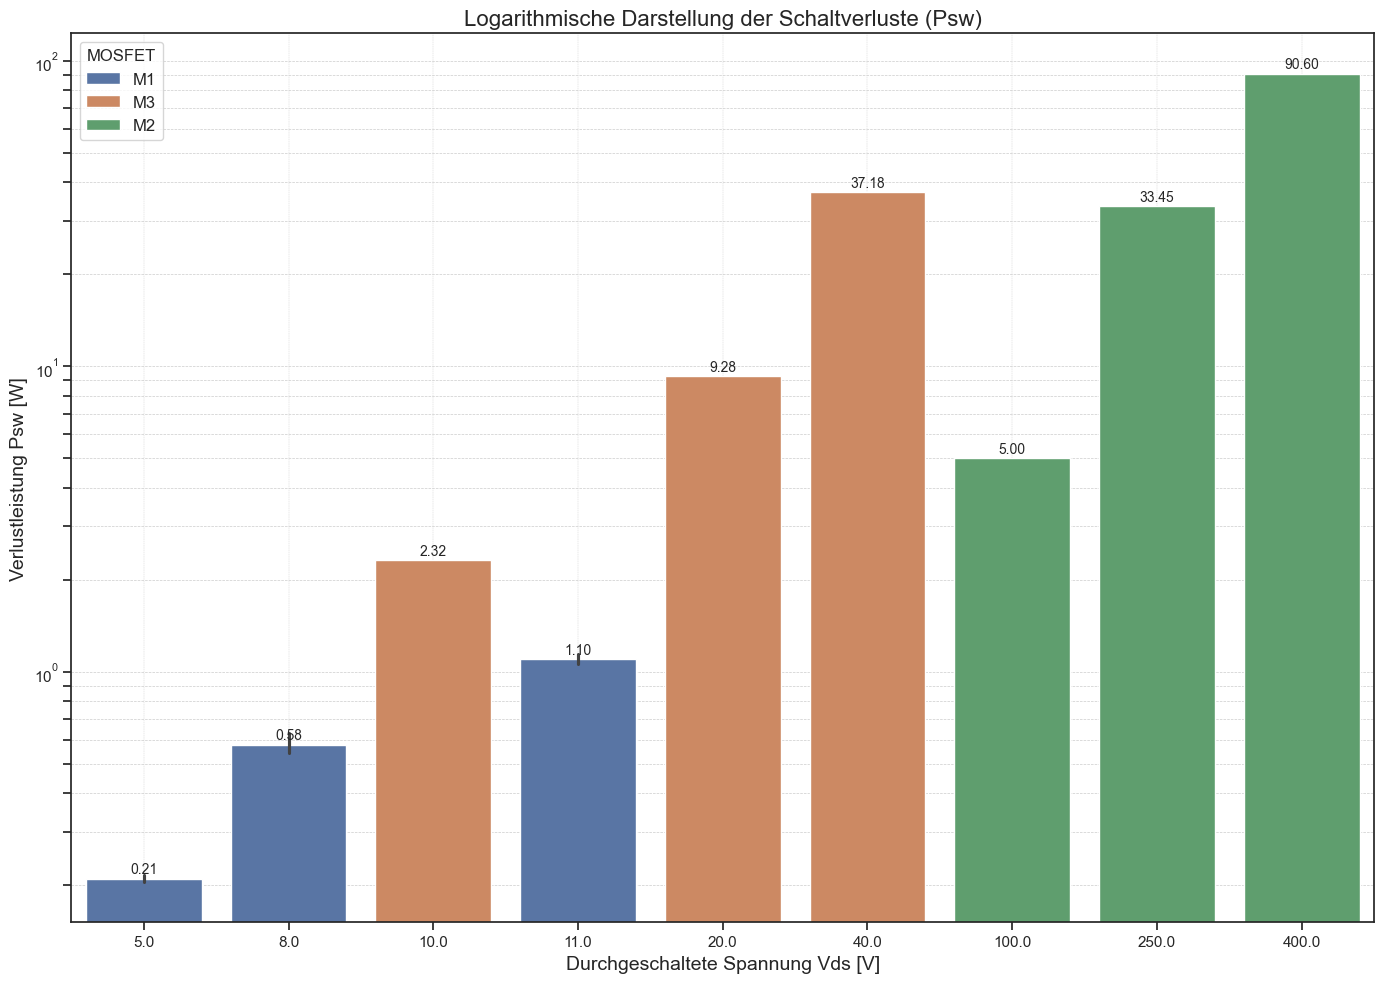

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator, LogFormatterMathtext

# CSV laden
df = pd.read_csv('Messdaten.csv')

# Daten umformen für barplot
psw_data = pd.DataFrame({
    'MOSFET': ['M1'] * len(df) + ['M2'] * len(df) + ['M3'] * len(df),
    'Vds': df['Vds_M1'].tolist() + df['Vds_M2'].tolist() + df['Vds_M3'].tolist(),
    'Psw': df['Psw_M1'].tolist() + df['Psw_M2'].tolist() + df['Psw_M3'].tolist()
})

# 0-Werte ersetzen (für log-Skala)
psw_data['Psw'] = psw_data['Psw'].replace(0, 1e-3)
psw_data['Vds'] = psw_data['Vds'].round(0)

# Stil
sns.set(style="ticks")

# Plot erzeugen (mehr Höhe für bessere Lesbarkeit)
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=psw_data, x='Vds', y='Psw', hue='MOSFET')

# Y-Achse logarithmisch mit Ticks bei 1–9 in jeder Dekade
ax.set_yscale('log')
major_locator = LogLocator(base=10.0, subs=tuple(range(1,10)), numticks=100)
formatter = LogFormatterMathtext(base=10.0, labelOnlyBase=False)
ax.yaxis.set_major_locator(major_locator)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.3)

# Balkenwerte horizontal und größer annotieren
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x-Mitte des Balkens
                height * 1.02,                       # leicht oberhalb des Balkens
                f"{height:.2f}",                    # Text
                ha='center',                        # horizontal zentriert
                va='bottom',                        # vertikal am unteren Ende des Texts
                fontsize=10,                        # größere Schrift
                rotation=0                          # keine Drehung
            )

# Achsentitel und Legende
plt.title('Logarithmische Darstellung der Schaltverluste (Psw)', fontsize=16)
plt.xlabel('Durchgeschaltete Spannung Vds [V]', fontsize=14)
plt.ylabel('Verlustleistung Psw [W]', fontsize=14)
plt.legend(title='MOSFET', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()
